In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
y_pred1 = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred1)
precision_lda = precision_score(y_test, y_pred1, average='weighted')
recall_lda = recall_score(y_test, y_pred1, average='weighted')
confusion_lda = confusion_matrix(y_test, y_pred1)

print("LDA Model Performance:")
print("Accuracy:", accuracy_lda)
print("Precision:", precision_lda)
print("Recall:", recall_lda)
print("Confusion Matrix:\n", confusion_lda)


LDA Model Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=20000)
log_reg.fit(X_train, y_train)
y_pred2 = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred2)
precision_log_reg = precision_score(y_test, y_pred2, average='weighted')
recall_log_reg = recall_score(y_test, y_pred2, average='weighted')
confusion_log_reg = confusion_matrix(y_test, y_pred2)
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("Confusion Matrix:\n", confusion_log_reg)

Logistic Regression Model Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


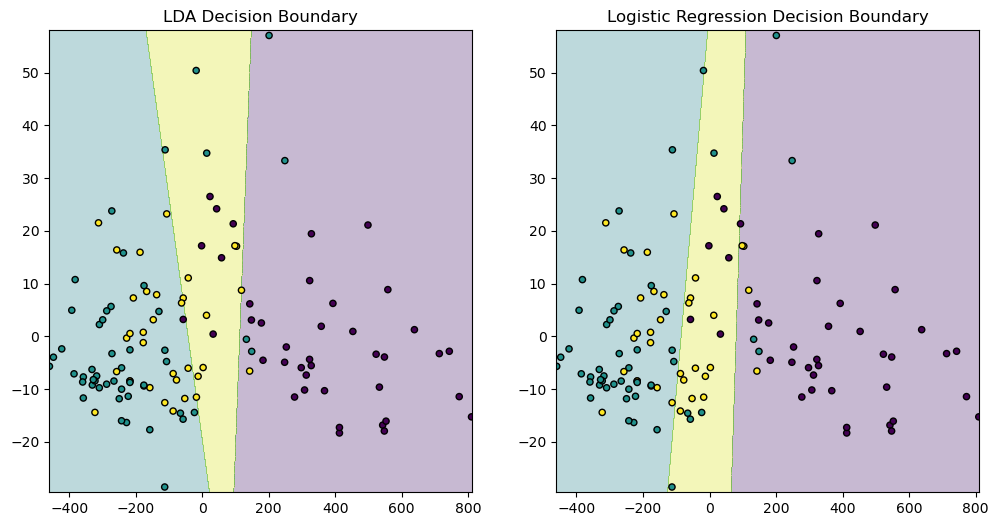

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Retrain LDA and Logistic Regression models on reduced data
lda_2d = LinearDiscriminantAnalysis()
lda_2d.fit(X_train_2d, y_train)
log_reg_2d = LogisticRegression(max_iter=2000)
log_reg_2d.fit(X_train_2d, y_train)

# Plot decision boundaries for LDA and Logistic Regression
def plot_decision_boundaries(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)

plt.figure(figsize=(12, 6))

# LDA decision boundary
plt.subplot(1, 2, 1)
plot_decision_boundaries(lda_2d, X_train_2d, y_train, "LDA Decision Boundary")

# Logistic Regression decision boundary
plt.subplot(1, 2, 2)
plot_decision_boundaries(log_reg_2d, X_train_2d, y_train, "Logistic Regression Decision Boundary")

plt.show()
